##**5.1** Load and Prepare the data:


In [ ]:
# Mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Numpy library to work with arrays
import numpy as np
# Import Matplotlib library to create 2D graphs and plots
import matplotlib.pyplot as plt

####Pick an color image of your choice and do the following.

1. Load the image using image reading library, you can use Pillow or matplotlib or any other library of your
confidence.

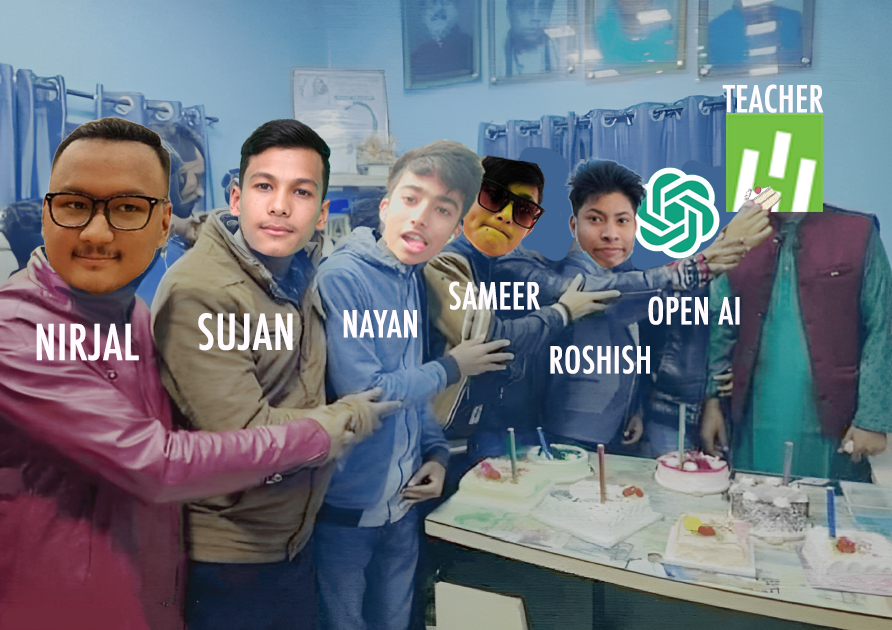

In [ ]:
# Import Image from PIL Library
from PIL import Image

# Open the image from the drive location
img = Image.open("/content/drive/MyDrive/Statistical Interpretation and Data Visualization/final.png")

# Print the chosen image
img

2. For the simplicity, convert the image into gray scale i.e. black and white.

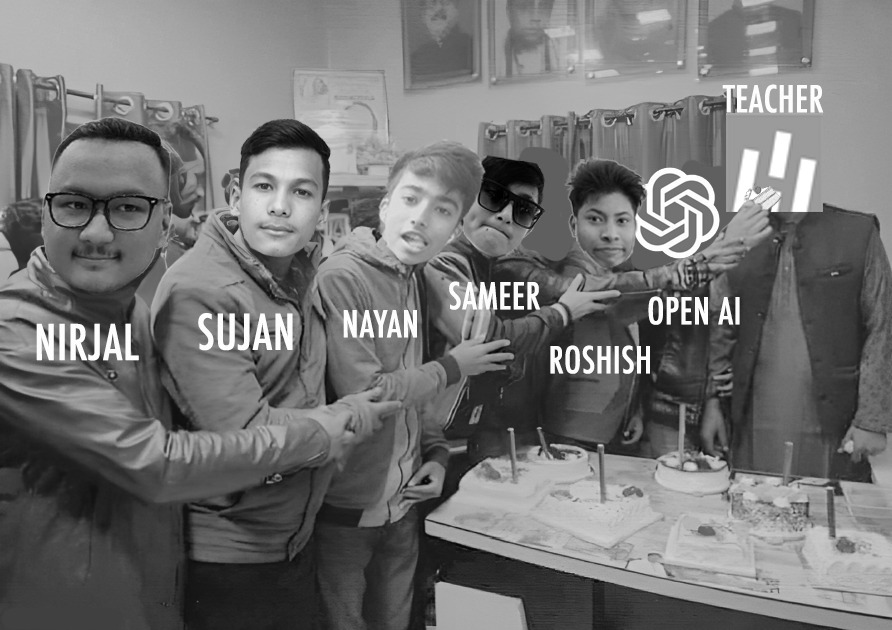

In [ ]:
# Convert the image into gray scale
imgGrey = img.convert('L')

# Print the black and white image
imgGrey

##**5.2**  Standardize/Scale the data:

To assure all the initial variables are transformed to same scale, it is a most to perform scaling operation before
any PCA operation. For the same purpose, we will perform standardization of data, which satisfies the following
expression:
#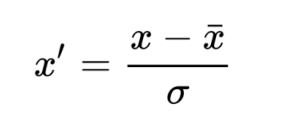

In [ ]:
# Load the image into array
arr = np.array(imgGrey)

# Calculate the mean and standard deviation
mean = arr.mean()  
std = arr.std()

# Perform standardization by subtracting the mean and dividing by the standard deviation
arr_standardized = (arr - mean) / std

# Print the Standardized Data
print("Standardized Data:\n", arr_standardized)

Standardized Data:
 [[ 1.23458182  1.21592853  1.23458182 ...  0.32057071  0.30191742
   0.30191742]
 [ 1.23458182  1.23458182  1.23458182 ...  0.339224    0.30191742
   0.35787728]
 [ 1.21592853  1.23458182  1.21592853 ...  0.39518386  0.37653057
   0.37653057]
 ...
 [-1.02246603 -1.00381274 -1.00381274 ...  0.46979701  0.4884503
   0.4884503 ]
 [-1.02246603 -1.00381274 -1.02246603 ...  0.46979701  0.50710359
   0.52575688]
 [-0.98515945 -1.00381274 -1.00381274 ...  0.4884503   0.50710359
   0.52575688]]


## **5.3** Calculate Covariance Matrix:

Each element of the covariance matrix represents covariance between each ijth element. The covariance between
two elements is calculated and stored in the matrix as shown in picture below:
# 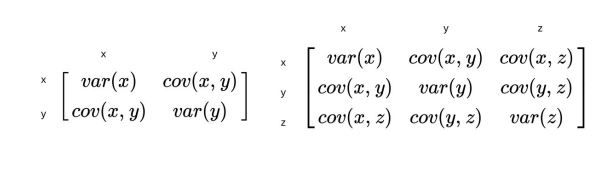

In [ ]:
# Calculate covariance matrix using cov function of numpy library
covariance = np.cov(arr_standardized.T) # We use .T to ensure that the rows of the array are treated as the variables and the columns as the samples, which is the default behavior of the numpy.cov function
# Print the Covariance Matrix
print("Covariance matrix:\n", covariance)

Covariance matrix:
 [[ 1.00853639  0.99739877  0.96518716 ... -0.0643322  -0.05718906
  -0.05016142]
 [ 0.99739877  0.99485731  0.97086826 ... -0.06752355 -0.05989563
  -0.05227341]
 [ 0.96518716  0.97086826  0.96352484 ... -0.07269787 -0.06441165
  -0.05623059]
 ...
 [-0.0643322  -0.06752355 -0.07269787 ...  0.32578119  0.31366194
   0.29871839]
 [-0.05718906 -0.05989563 -0.06441165 ...  0.31366194  0.30863106
   0.29802456]
 [-0.05016142 -0.05227341 -0.05623059 ...  0.29871839  0.29802456
   0.29832198]]


##**5.4** Eigen Decomposition:

Decompose a covariance matrix into eigen values and eigen vectors:
# 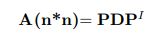

**Where:**
1. A(n*n): −Covariance Matrix.
2. P:- Eigen Vector of Covariance Matrix.
3. D:- Diagonal Matrix. Diagonal elements are Eigen Values.
4. P^I: −Inverse of Eigen Vector.

In [ ]:
# Calculate the Eigen Values and Eigen Vectors of the covariance matrix  
D, P = np.linalg.eig(covariance)

# Print the Eigen Values and Eigen Vectors
print("Eigen values:\n", D)
print("Eigen vectors:\n", P)

Eigen values:
 [ 2.13725593e+02+0.00000000e+00j  1.66583268e+02+0.00000000e+00j
  8.38765426e+01+0.00000000e+00j  5.38884635e+01+0.00000000e+00j
  4.68367134e+01+0.00000000e+00j  2.85593391e+01+0.00000000e+00j
  2.62150616e+01+0.00000000e+00j  2.26716490e+01+0.00000000e+00j
  1.84489569e+01+0.00000000e+00j  1.58562457e+01+0.00000000e+00j
  1.20514812e+01+0.00000000e+00j  9.66110337e+00+0.00000000e+00j
  8.18184566e+00+0.00000000e+00j  7.15472617e+00+0.00000000e+00j
  6.50178119e+00+0.00000000e+00j  6.00541717e+00+0.00000000e+00j
  5.60149363e+00+0.00000000e+00j  5.25232614e+00+0.00000000e+00j
  4.97997904e+00+0.00000000e+00j  4.74509844e+00+0.00000000e+00j
  4.42275199e+00+0.00000000e+00j  4.26492808e+00+0.00000000e+00j
  4.07398385e+00+0.00000000e+00j  3.73415918e+00+0.00000000e+00j
  3.52193708e+00+0.00000000e+00j  3.32137780e+00+0.00000000e+00j
  3.31258446e+00+0.00000000e+00j  2.84564993e+00+0.00000000e+00j
  2.81053454e+00+0.00000000e+00j  2.65466232e+00+0.00000000e+00j
  2.609184

##**5.5** Identify Principal Components:

Determine the **explained variance** by each **principal components**, based on this we can determine how many principal components to pick from.
*   Experiment with Principal Components:<br>
– Pick **three different combination** of principal components with various **explained variance value** and **compare** the result.

In [ ]:
# Store the sum of Eigen Values
total = sum(D)

# Sort the Eigen Values in descending order and for each element multiply it with 100 to get the percentage
var_exp = [(i / total)*100 for i in sorted(D, reverse=True)]
#6% 5 4 3 2 1

# Store the cumulative sum of the elements
cum_var_exp = np.cumsum(var_exp)
#6 6+5 6+5+4 

# Choose top three principal components
pc1, pc2, pc3 = var_exp[:3]
# Choose next three principal components
pc4, pc5, pc6 = var_exp[3:6]
# Choose next three principal components
pc7, pc8, pc9 = var_exp[6:9]

# Print the principal components 
print(f"Top 3 principal components:\n {pc1}, {pc2}, {pc3}\n")
print(f"Next 3 principal components:\n {pc4}, {pc5}, {pc6}\n")
print(f"Next 3 principal components:\n {pc7}, {pc8}, {pc9}\n")

Top 3 principal components:
 (25.03098490577201+0j), (19.50979850055151+0j), (9.823402227411142+0j)

Next 3 principal components:
 (6.31127650012377+0j), (5.485393902883865+0j), (3.3447954240038893+0j)

Next 3 principal components:
 (3.070239743248458+0j), (2.6552444821941132+0j), (2.1606937850977936+0j)



##**5.6** Reconstruction of the image:

Reconstruct the image based on number of principal components you picked in step **4.5**. Reconstruct all three images and conclude the result based on your observation. Display the reconstructed image, experiment with various number of components.

In [ ]:
# Create a function which takes the principal component as parameter
def reconstruct(n):
  print("When principal Component = " + str(n))

  # Calculate the image data 
  # Select the top n eigenvectors
  eigen_vector = P[:,:n]
  
  # Transform the original data using the eigenvectors
  image_data = np.dot(arr_standardized, eigen_vector)

  # Reconstruct the image from the transformed data using the inverse transformation
  image_reconstructed = np.dot(image_data, eigen_vector.T).real

  # Plot the original, grayscale, and reconstructed images
  fig, axs = plt.subplots(1, 3, figsize=(20, 10))

  # Original Image
  axs[0].imshow(img)
  axs[0].set_title('Original Image')

  # Grayscale Image
  axs[1].imshow(imgGrey, cmap='gray')
  axs[1].set_title('Grayscale Image')

  # Reconstructed Image
  axs[2].imshow(image_reconstructed, cmap='gray')
  axs[2].set_title('Reconstructed Image')

When principal Component = 9


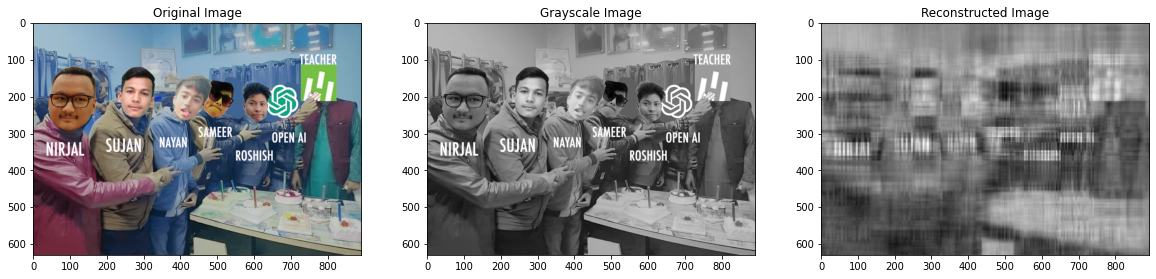

In [ ]:
# Pass the value of pc3
n = 9
reconstruct(n)

When principal Component = 3


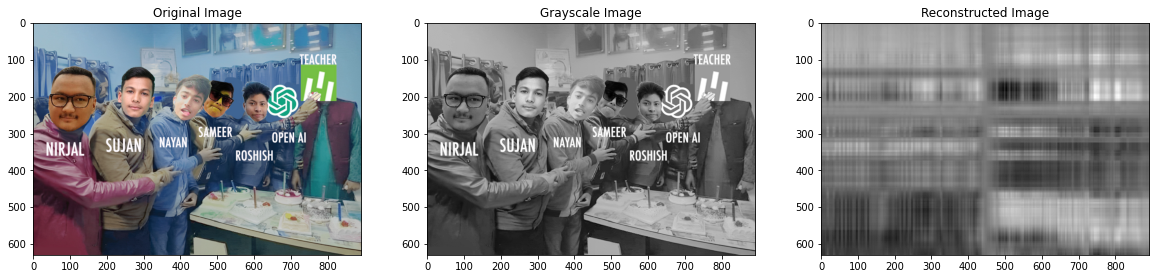

In [ ]:
# Pass the value of pc6
n = 3
reconstruct(n)

When principal Component = 2


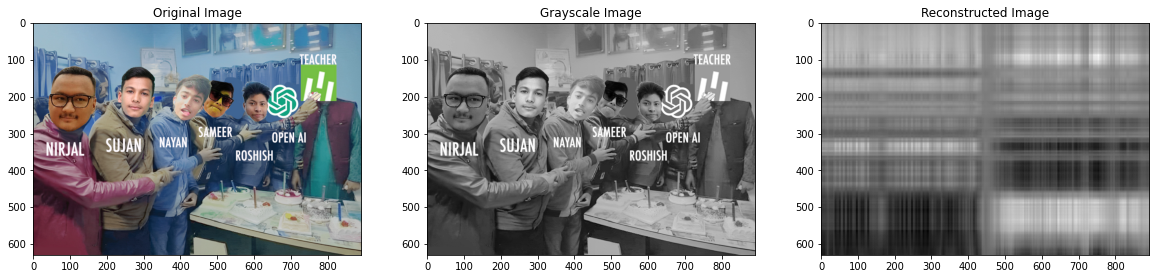

In [ ]:
# Pass the value of pc9
n = 2
reconstruct(n)

**CONCLUSION:** <br>
We have compressed an Image using Principal Component Analysis(PCA) which is a statistical procedure. 
    It is often used for dimensionality reduction, where the goal is to reduce the number of features in the data while still preserving as much information as possible. 
    Here, we have used PIL, Numpy and Matplotlib library to import image, to work with arrays and to create 2D graphs and plots respectively. 

    By following the steps below we can perform Image Compression using PCA:
    1. Load the desired image:
        Using Image.open() of PIL library we upload our image and store it in a variable.
    2. Convert it into black and white
        Using convert() we turn the image into gray scale.
    3. Perform standardization of data
        We find the mean and standard deviation and perform the necessary calculation to standarize the data.
    4. Calculate covariance matrix
        Using cov() of numpy library we find the covariance of the matrix
    5. Decompose the matrix into eigen values and eigen vectors
        Using linalg.eig() of numpy library  we calculate the Eigen Values and Eigen Vectors of the covariance matrix  
    6. Determine explained variance by each principal components
        Chose and printed the first three then the next three and again the next three combination of principal components
    7. Reconstruction of the image
        Used a user defined function to calculate image data and display the three categories of image i.e. Original, Grayscale and Reconstructed

You can decrease the dimensionality of the data while retaining as much information as you can by utilizing PCA. How much of the data's variance is retained depends on how many principal components you use. The number of principal components should be determined by the particular requirements of your application.

Use more principal components if you need to minimize the data's dimensionality while retaining the most information possible. The number of dimensions will increase as a result, but each dimension will capture a sizable portion of the data variance.

On the other hand, you could wish to employ fewer principal components if you need to lower the dimensionality more drastically. As a result, there will be fewer dimensions, but each dimension could be able to capture less variance in the data.

Here, we have passed n = 9, 3, 2 (0 to 9, 0 to 3, 0 to 2) as principal components which results in low dimension image i.e. it returns drastically reduced image as explained above. For more clear image we can pass higher value of n.